In [1]:
import geopandas as gpd

In [6]:
new_york = gpd.read_file('./Data/New_York_Boundary/State.shp')

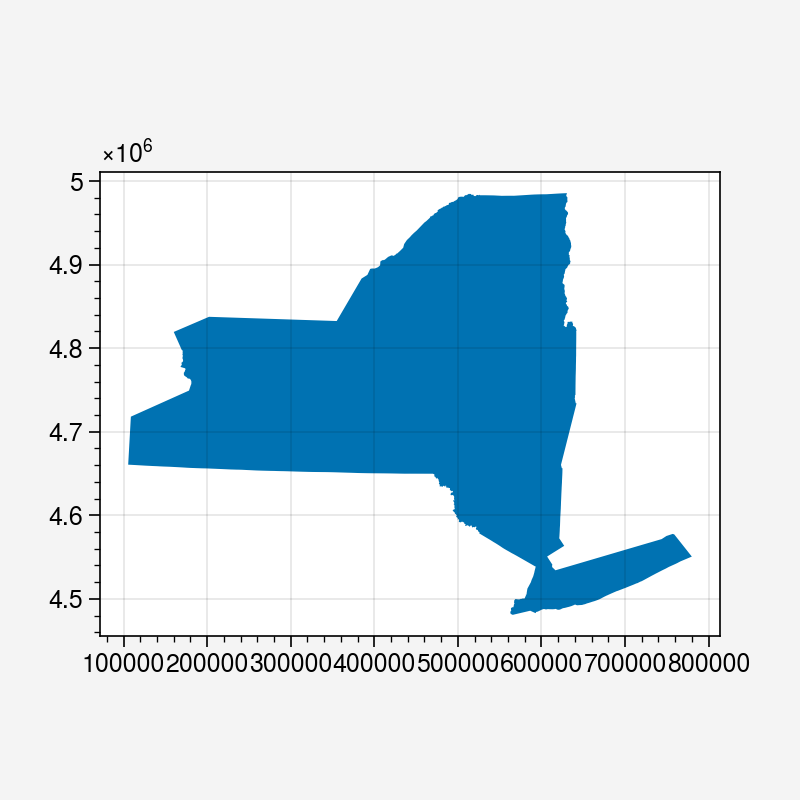

In [5]:
gdf.plot()

In [9]:
watersheds = gpd.read_file('./Data/Watersheds/WBD_National_GDB/WBD_National_GDB.gdb', layer='WBDHU12')

In [10]:
watersheds.head()

,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,referencegnis_ids,areaacres,areasqkm,states,...,name,hutype,humod,tohuc,noncontributingareaacres,noncontributingareasqkm,globalid,shape_Length,shape_Area,geometry
0,{AAF0D733-828B-4B8E-9E52-388A49AC0A23},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,NaN,2024-08-15 06:55:45+00:00,1817535,13211.47,53.46,"IA,MN",...,Judicial Ditch Number Thirteen,S,NM,070200090403,0.0,0.0,{991AACA7-E29C-11E2-8094-0021280458E6},0.637165,0.005951,"MULTIPOLYGON (((-94.01060 43.56298, -94.01046 ..."
1,{FEEC96BB-D4C0-468F-A345-6996A458D7A7},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,NaN,2024-08-15 06:55:45+00:00,653935,10514.34,42.55,MN,...,West Branch Lac qui Parle River,S,NM,070200030705,0.0,0.0,{A220BE40-E29C-11E2-8094-0021280458E6},0.456829,0.004851,"MULTIPOLYGON (((-96.13949 44.97296, -96.13908 ..."
2,{5954C8E6-710A-4F46-9409-C39F7A4E8031},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,NaN,2024-08-15 06:55:45+00:00,641985,15561.22,62.97,MN,...,County Ditch Number Thirtyfour,S,NM,070200030603,0.0,0.0,{A220F315-E29C-11E2-8094-0021280458E6},0.701524,0.007178,"MULTIPOLYGON (((-95.91504 44.97483, -95.91437 ..."
3,{6042907D-3DB7-4C8A-9362-889E4CDC4102},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,NaN,2024-08-15 06:55:45+00:00,315688,31033.21,125.59,GA,...,Upper Horse Creek,S,NM,030701040702,0.0,0.0,{96CC80E1-E29C-11E2-8094-0021280458E6},0.554951,0.011983,"MULTIPOLYGON (((-82.99057 31.98012, -82.99115 ..."
4,{A802D673-860B-4BD3-9EA1-1C954F9F03B9},{511D2AC8-11BA-45FC-AB98-F69D693D4C44},Watershed Boundary Dataset (WBD),Natural Resources and Conservation Service and...,NaN,2024-08-15 06:55:45+00:00,313139,28839.94,116.71,GA,...,Crooked Creek,S,NM,030701040507,0.0,0.0,{96CBF8CF-E29C-11E2-8094-0021280458E6},0.650165,0.011146,"MULTIPOLYGON (((-83.13956 32.08949, -83.13932 ..."


In [17]:
watersheds = watersheds.to_crs(new_york.crs)

In [30]:
ws_in_new_york = watersheds.states.str.contains('NY', na=False)

In [13]:
new_york.geometry

0    MULTIPOLYGON (((580767.735 4504621.963, 580749...
Name: geometry, dtype: geometry

In [19]:
ws_in_new_york = watersheds.intersects(new_york.geometry)

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [31]:
ny_watersheds = watersheds[ws_in_new_york]

In [32]:
ny_watersheds.shape

(1686, 21)

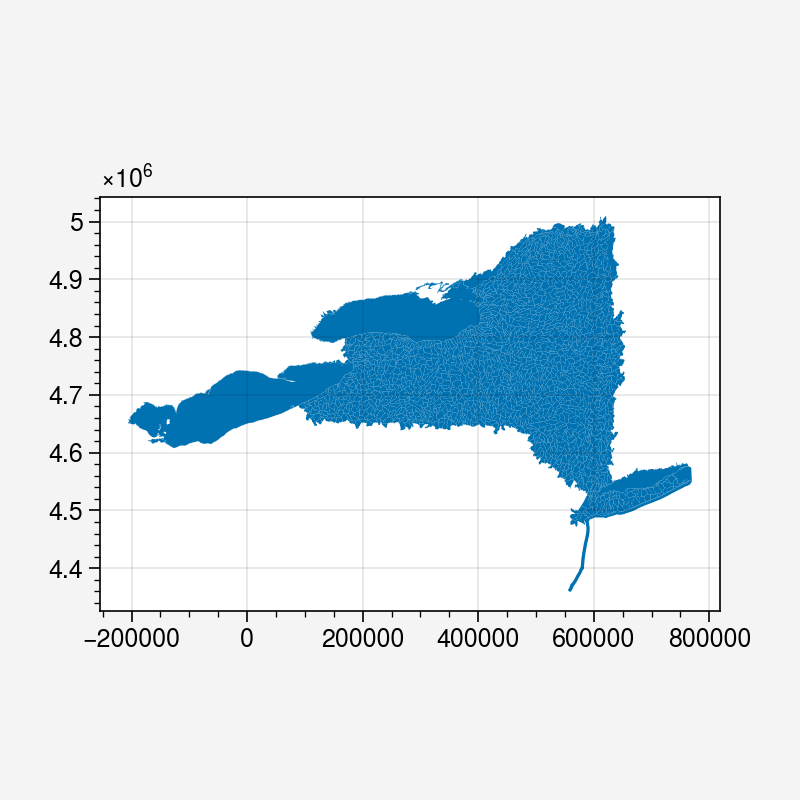

In [33]:
ny_watersheds.plot()

In [59]:
test = ny_watersheds[ny_watersheds.name.str.contains('Ontario', na=False)]

In [57]:
# To Remove:
# Long Island Sound
# Lake Erie
# Lake Ontario
erie = ny_watersheds.name == 'Lake Erie'
ontario = ny_watersheds.name == 'Lake Ontario'
long_island = ny_watersheds.name == 'Long Island Sound'
ny_watersheds_clean = ny_watersheds[~erie & ~ontario & ~long_island]

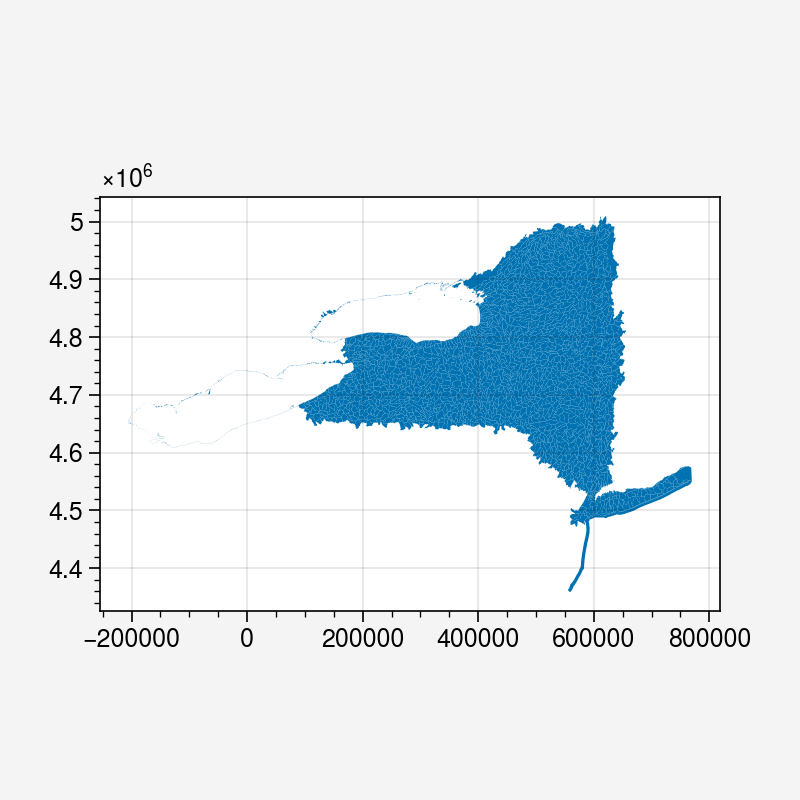

In [58]:
ny_watersheds_clean.plot()

In [83]:
from shapely.geometry import Polygon

ontario = Polygon([[150_000, 4_840_000],
                   [200_000, 4_840_000],
                   [200_000, 4_900_000],
                   [150_000, 4_900_000],
                   [150_000, 4_840_000]])
erie = Polygon([[-200_000, 4_600_000],
                [-100_000, 4_600_000],
                [-100_000, 4_700_000],
                [-200_000, 4_700_000],
                [-200_000, 4_600_000]])
long_island = Polygon([[550_000, 4_300_000],
                       [600_000, 4_300_000],
                       [600_000, 4_400_000],
                       [550_000, 4_400_000],
                       [550_000, 4_300_000]])
crs = new_york.crs
ontario_polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[ontario])
erie_polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[erie])
long_island_polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[long_island])

In [85]:
bad_ontario = ny_watersheds_clean.intersects(ontario_polygon.unary_union)
bad_erie = ny_watersheds_clean.intersects(erie_polygon.unary_union)
bad_long_island = ny_watersheds_clean.intersects(long_island_polygon.unary_union)
ny_watersheds_clean2 = ny_watersheds_clean[~bad_ontario & ~bad_erie & ~bad_long_island]

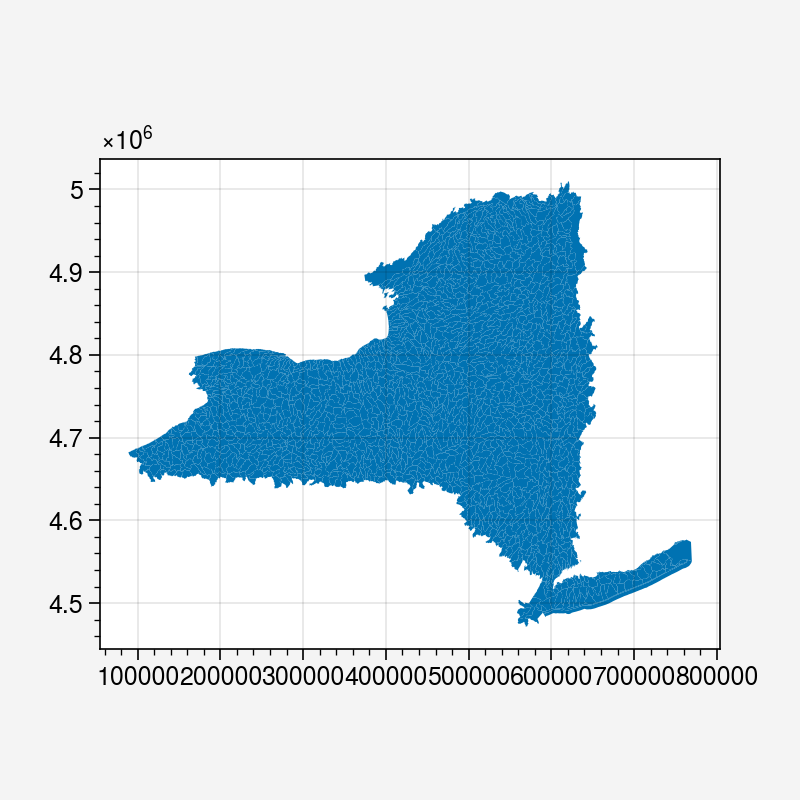

In [86]:
ny_watersheds_clean2.plot()

In [90]:
ny_watersheds_clean2 = ny_watersheds_clean2[['name', 'geometry']]

In [91]:
ny_watersheds_clean2

,name,geometry
8493,West Branch Conewango Creek,"MULTIPOLYGON (((164636.727 4706106.792, 164592..."
10454,Hare Creek,"MULTIPOLYGON (((113084.537 4661753.126, 113103..."
10455,Silver Creek,"MULTIPOLYGON (((160211.416 4714877.607, 160224..."
11780,Block Island Sound,"MULTIPOLYGON (((768708.832 4574033.525, 768788..."
12763,Gerritsen Creek-Rockaway Inlet,"MULTIPOLYGON (((587660.897 4497545.508, 587745..."
...,...,...
98755,Cripple Creek,"MULTIPOLYGON (((509636.315 4749653.294, 509698..."
98757,Deans Creek,"MULTIPOLYGON (((465449.638 4777781.678, 465514..."
98759,Headwaters Roeliff Jansen Kill,"MULTIPOLYGON (((623105.205 4681664.226, 623116..."
99009,Horseneck Brook-Frontal Long Island Sound,"MULTIPOLYGON (((615225.875 4552640.019, 615236..."


In [92]:
ny_watersheds_clean2.to_file('./Data/Watersheds/new_york_watersheds_12.shp')